In [1]:
import tensorflow

In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=1000)

In [3]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):  
    results= np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data)

In [4]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 242us/sample - loss: 0.5477 - binary_accuracy: 0.7651 - val_loss: 0.4385 - val_binary_accuracy: 0.8384
Epoch 2/20
15000/15000 [==============================] - 2s 155us/sample - loss: 0.4009 - binary_accuracy: 0.8458 - val_loss: 0.3681 - val_binary_accuracy: 0.8513
Epoch 3/20
15000/15000 [==============================] - 2s 158us/sample - loss: 0.3450 - binary_accuracy: 0.8633 - val_loss: 0.3535 - val_binary_accuracy: 0.8523
Epoch 4/20
15000/15000 [==============================] - 2s 160us/sample - loss: 0.3254 - binary_accuracy: 0.8687 - val_loss: 0.3337 - val_binary_accuracy: 0.8634
Epoch 5/20
15000/15000 [==============================] - 2s 153us/sample - loss: 0.3122 - binary_accuracy: 0.8731 - val_loss: 0.3412 - val_binary_accuracy: 0.8586
Epoch 6/20
15000/15000 [==============================] - 2s 153us/sample - loss: 0.3041 - binary_accuracy: 0.8751 - val_loss: 0.3

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [10]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend() 
plt.show()

<Figure size 640x480 with 1 Axes>

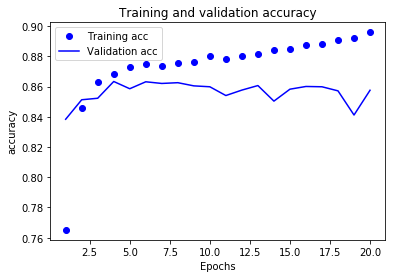

In [11]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()